In [1]:
# Turing Machine to calculate Fibonacci Sequence
# input = n
# output = F(n)

In [2]:
def parse(defn):
    states = {}
    for s in defn:
        state_name = s.split(":")[0]
        t_string = s.split(":")[1].strip().split(" ")
#         print(t_string)
#         assert (len(t_string) == 3)
        transition = {}
        for t in t_string:
            read = t[0]
            write = t[1]
            direction = t[2]
            next_state = t[3:]
            transition[read] = {"write": write, "direction": direction, "next":next_state}
        states[state_name] = transition
    return states

def run(machine, tape, start="START", debug=False):
    state = start
    head = 0
    head_char = None
    write = None
    while state != "HALT":
        head_char = tape[head]
        write = machine[state][head_char]["write"]
        tape[head] = write
        direction = machine[state][head_char]["direction"]
        next_state = machine[state][head_char]["next"]
        
        if debug == True:
            print_tape(tape, head)
            print("state ", state, "read", head_char, "write" , write)
            
        if direction == "R":
            head += 1
            if head >= len(tape):
                tape.append("_")
        else:
            head -= 1
            if head < 0:
                tape.insert(0,"_")
                head += 1
                
        state = next_state
        
    if debug == True:
        print_tape(tape, head)
        print("state ", state)
        
    return tape

def print_tape(tape, head):
    for i in range(0,head):
        print(tape[i], end="")
    print("^", end="")
    for i in range(head, len(tape)):
        print(tape[i], end="")
    print()
    

In [3]:
#Format: State number: (input<0,1,_>,output<0,1,_>,head<L,R>,newstate) x 3
#Machine: reads input, writes output to tape, moves in the direction specified
#Go to the end of the input

## TODO: subtract first and then do the check instead of other way around (thus the machine only accepts input >= 1)
machine = [
    "START: 00RSTART 11RSTART __Rinit0",
    #write 00_01_ (we are using 00 to represent number 0 and 01 to represent 1 b/c we need to mark chars as read or not)
    "init0: 00Rinit1 10Rinit1 _0Rinit1",
    "init1: 00Rinit2 10Rinit2 _0Rinit2",
    "init2: 0_Rinit3 1_Rinit3 __Rinit3",
    "init3: 00Rinit4 10Rinit4 _0Rinit4",
    "init4: 01Rinit5 11Rinit5 _1Rinit5",
    "init5: 0_Lback0 1_Lback0 __Lback0", #moving L because we wrote a 1 already, so now we want to go back
    # tape now is "n_0*_1", go back to n
    "back0: 00Lback0 11Lback0 __Lback1",
    "back1: 00Lback1 11Lback1 __Lback2",
    "back2: 00Lback2 11Lback2 __Rcheckn0", #moving R because we were at a blank (to the left of n)
    #back at beginning, check to see if n == 0
    "checkn0: 00Rcheckn0 11Rsub0 __Rclean",
    # state 7 means n != 0
    # move to the right of n
    "sub0: 00Rsub0 11Rsub0 __Lsub1",
    # now at least significant bit of n, subtract 1
    "sub1: 01Lsub1 10Lsub2", # should never reach _
    "sub2: 00Lsub2 11Lsub2 __Rfib0",
    # state fib0 means we have to start adding the stuff (we are at leftmost bit of n)
    "fib0: 00Rfib0 11Rfib0 __Raddnc0",
    "fib4: 00Lfib4 11Lfib4 __Lback0", # we need to go back one extra "_" before going to the back subroutine
    
    
    # ADD Subroutine copied from below
    "addnc0: 01Raddnc1 11Raddnc2 __L0nc",
    "addnc1: 00R0nc 11R1nc",
    "addnc2: 00Raddnc0 11Raddnc0",
    
    "addc0: 01Raddc1 11Raddc2 __L1nc",
    "addc1: 00R1nc 11R0c",
    "addc2: 00Raddc0 11Raddc0",
    
    "0nc: 00R0nc 11R0nc __R0nc1",
    "0nc1: 01R0nc2 11R0nc3 __Rfinishadd",
    "0nc2: 00Rwrite0nc 11Rwrite1nc",
    "0nc3: 00R0nc1 11R0nc1",
    
    "1nc: 00R1nc 11R1nc __R1nc1",
    "1nc1: 01R1nc2 11R1nc3 __Lwrite1nc",
    "1nc2: 00Rwrite1nc 11Rwrite0c",
    "1nc3: 00R1nc1 11R1nc1",
    
    "0c: 00R0c 11R0c __R0c1",
    "0c1: 01R0c2 11R0c3 __Rfinishadd",
    "0c2: 00Rwrite0c 11Rwrite1c",
    "0c3: 00R0c1 11R0c1",
    
    "write0nc: 00Rwrite0nc 11Rwrite0nc __Rwrite0nc1",
    "write0nc1: 00Rwrite0nc1 11Rwrite0nc1 _0Rwrite0nc2",
    "write0nc2: 00Rwrite0nc1 11Rwrite0nc1 _0Lgobacknc",
    
    "write1nc: 00Rwrite1nc 11Rwrite1nc __Rwrite1nc1",
    "write1nc1: 00Rwrite1nc1 11Rwrite1nc1 _0Rwrite1nc2",
    "write1nc2: 00Rwrite1nc1 11Rwrite1nc1 _1Lgobacknc",
    
    "write0c: 00Rwrite0c 11Rwrite0c __Rwrite0c1",
    "write0c1: 00Rwrite0c1 11Rwrite0c1 _0Rwrite0c2",
    "write0c2: 00Rwrite0c1 11Rwrite0c1 _0Lgobackc",
    
    "write1c: 00Rwrite1c 11Rwrite1c __Rwrite1c1",
    "write1c1: 00Rwrite1c1 11Rwrite1c1 _0Rwrite1c2",
    "write1c2: 00Rwrite1c1 11Rwrite1c1 _1Lgobackc",
    
    "gobacknc: 00Lgobacknc 11Lgobacknc __Lgobacknc1",
    "gobacknc1: 00Lgobacknc1 11Lgobacknc1 __Lgobacknc2",
    "gobacknc2: 00Lgobacknc2 11Lgobacknc2 __Raddnc0",
    
    "gobackc: 00Lgobackc 11Lgobackc __Lgobackc1",
    "gobackc1: 00Lgobackc1 11Lgobackc1 __Lgobackc2",
    "gobackc2: 00Lgobackc2 11Lgobackc2 __Raddc0",

    "finishadd: 00Lfinishadd 11Lfinishadd __Lfinish1",
    "finish1: 00Lfinish1 11Lfinish1 __Rcopy",
    
    # COPY OVER subroutine
    "copy: 00Rcopy2 10Rcopy2 __Lfrontcopy",
    "copy2:00Rcopy 11Rcopy",
    "frontcopy: 00Lfrontcopy 11Lfrontcopy _1Lsub1s",
    "sub1s: 01Lsub1s 11Lsub1s __Rcopy3", #go all the way to the end and then backwards copy
    "copy3: 00Rcopy3 11Rcopy3 __Rcopy4",
    "copy4: 00Rcopy4 11Rcopy4 __Lbcp", #backcopy = bcp
    "bcp: 0_Lbcp0 1_Lbcp1",
    "bcp1: 01Lbcp0 11Lbcp1 _1Lbcpa",
    "bcp0: 00Lbcp0 10Lbcp1 _0Lbcpa",
    "bcpa: 0_Lbcpa0 1_Lbcpa1",
    "bcpa1: 01Lbcpa0 11Lbcpa1 __Rtest", #if we've reached the second _ then check to see if its a zero or one
    "bcpa0: 00Lbcpa0 10Lbcpa1 __Rtest",
    "fwd: 00Rfwd 11Rfwd __Rfwd2",
    "fwd2: 00Rfwd 11Rfwd2 __Lfwd3",
    "fwd3: __Lbcp",
    "test: 00Lback1 11Lfwd", #if the digit is a zero then that means we're done with the barrier of 1s we created
    
    # state clean means n == 0, so now we copy everything over
    "clean: 01Rclean 11Rclean _1Lclean2",
    "clean2: 01Lclean2 11Lclean2 _1Lclean3",
    "clean3: 01Lclean3 11Lclean3 __Rclean4",
    "clean4: 00Rclean4 11Rclean4 __Lclean5",
    
    "clean5: 0_Lcopy0first 1_Lcopy1first",
    
    "copy0first: 0_Lcopy0first1 1_Lcopy0first1",
    "copy0first1: 00Lcopy0first1 11Lcopy0first1 _0Rcopy0first2",
    "copy0first2: 0_Rclean6 1_Rclean6",
    
    "copy1first: 0_Lcopy1first1 1_Lcopy1first1",
    "copy1first1: 00Lcopy1first1 11Lcopy1first1 _1Rcopy1first2",
    "copy1first2: 0_Rclean6 1_Rclean6",
    
    "clean6: 00Rclean6 11Rclean6 __Lclean7",
    "clean7: 0_Lclean80 1_Lclean81",
    "clean80: 0_Lclean90 1_Lpolish",
    "clean81: 0_Lclean91 1_Lpolish",
    "clean90: 00Lclean90 11Lclean90 _0RcleanA",
    "clean91: 00Lclean91 11Lclean91 _1RcleanA",
    "cleanA: 0_Rclean6 1_Rclean6",
    
    "polish: 0_Lpolish 1_Lpolish __RHALT"
]

In [4]:
len(machine) #omg would you look at that it's a fibonacci number lmao

89

In [5]:
mach = parse(machine)
t = run(mach, tape = list("101"))
ans = "".join(t).replace("_","")
print(int(ans, 2))
pass

8


In [6]:
lens = []
a = 0
b = 1
for i in range(35):
    tape = list(bin(i)[2:])
    t = run(mach, tape)
    ans = "".join(t).replace("_","")
    tmp = a+b
    a = b
    b = tmp
    print(int(ans, 2), len(t))
    assert int(ans,2) - a == 0
    lens.append(len(t))

1 9
1 12
2 15
3 17
5 22
8 26
13 30
21 34
34 39
55 43
89 47
144 51
233 55
377 59
610 63
987 67
1597 72
2584 76
4181 82
6765 86
10946 90
17711 94
28657 98
46368 102
75025 106
121393 110
196418 114
317811 118
514229 122
832040 126
1346269 130
2178309 136
3524578 141
5702887 145
9227465 149


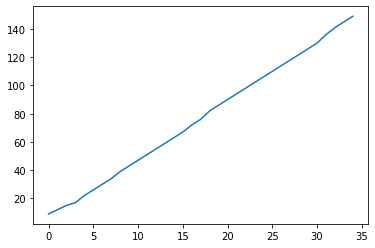

In [7]:
from matplotlib import pyplot as plt
plt.plot(lens) #grows linearly

In [8]:
add = [
    "addnc0: 01Raddnc1 11Raddnc2 __L0nc",
    "addnc1: 00R0nc 11R1nc",
    "addnc2: 00Raddnc0 11Raddnc0",
    
    "addc0: 01Raddc1 11Raddc2 __L1nc",
    "addc1: 00R1nc 11R0c",
    "addc2: 00Raddc0 11Raddc0",
    
    "0nc: 00R0nc 11R0nc __R0nc1",
#     "0nc1: 01R0nc2 11R0nc3 __Lwrite0nc",
    "0nc1: 01R0nc2 11R0nc3 __Rfinish",
    "0nc2: 00Rwrite0nc 11Rwrite1nc",
    "0nc3: 00R0nc1 11R0nc1",
    
    "1nc: 00R1nc 11R1nc __R1nc1",
    "1nc1: 01R1nc2 11R1nc3 __Lwrite1nc",
#     "1nc1: 01R1nc2 11R1nc3 __RHALT",
    "1nc2: 00Rwrite1nc 11Rwrite0c",
    "1nc3: 00R1nc1 11R1nc1",
    
    "0c: 00R0c 11R0c __R0c1",
#     "0c1: 01R0c2 11R0c3 __Lwrite0c",
    "0c1: 01R0c2 11R0c3 __Rfinish",
    "0c2: 00Rwrite0c 11Rwrite1c",
    "0c3: 00R0c1 11R0c1",
    
    "write0nc: 00Rwrite0nc 11Rwrite0nc __Rwrite0nc1",
    "write0nc1: 00Rwrite0nc1 11Rwrite0nc1 _0Rwrite0nc2",
    "write0nc2: 00Rwrite0nc1 11Rwrite0nc1 _0Lgobacknc",
#     "write0nc1: _0Rwrite0nc2",
#     "write0nc2: _0Lgobacknc",
    
    "write1nc: 00Rwrite1nc 11Rwrite1nc __Rwrite1nc1",
    "write1nc1: 00Rwrite1nc1 11Rwrite1nc1 _0Rwrite1nc2",
    "write1nc2: 00Rwrite1nc1 11Rwrite1nc1 _1Lgobacknc",
#     "write1nc1: _0Rwrite1nc2",
#     "write1nc2: _1Lgobacknc",
    
    "write0c: 00Rwrite0c 11Rwrite0c __Rwrite0c1",
    "write0c1: 00Rwrite0c1 11Rwrite0c1 _0Rwrite0c2",
    "write0c2: 00Rwrite0c1 11Rwrite0c1 _0Lgobackc",
#     "write0c1: _0Rwrite0c2",
#     "write0c2: _0Lgobackc",
    
    "write1c: 00Rwrite1c 11Rwrite1c __Rwrite1c1",
    "write1c1: 00Rwrite1c1 11Rwrite1c1 _0Rwrite1c2",
    "write1c2: 00Rwrite1c1 11Rwrite1c1 _1Lgobackc",
#     "write1c1: _0Rwrite0c2",
#     "write1c2: _1Lgobackc",
    
    "gobacknc: 00Lgobacknc 11Lgobacknc __Lgobacknc1",
    "gobacknc1: 00Lgobacknc1 11Lgobacknc1 __Lgobacknc2",
    "gobacknc2: 00Lgobacknc2 11Lgobacknc2 __Raddnc0",
#     "gobacknc3: 00Lgobacknc3 11Lgobacknc3 __LSTART",
    
    "gobackc: 00Lgobackc 11Lgobackc __Lgobackc1",
    "gobackc1: 00Lgobackc1 11Lgobackc1 __Lgobackc2",
    "gobackc2: 00Lgobackc2 11Lgobackc2 __Raddc0",
#     "gobackc3: 00Lgobackc3 11Lgobackc3 __Laddc0",
    "finish: 00Lfinish 11Lfinish __Lfinish1",
    "finish1: 00Lfinish1 11Lfinish1 __Lfinish2",
    "finish2: 00Lfinish2 11Lfinish2 __RHALT",
]

add_mach = parse(add)

In [9]:
run(add_mach, list("0101_0101"), start="addnc0", debug=True)
pass

^1101_0101
state  addnc0 read 0 write 1
1^101_0101
state  addnc1 read 1 write 1
11^01_0101
state  1nc read 0 write 0
110^1_0101
state  1nc read 1 write 1
1101^_0101
state  1nc read _ write _
1101_^1101
state  1nc1 read 0 write 1
1101_1^101
state  1nc2 read 1 write 1
1101_11^01
state  write0c read 0 write 0
1101_110^1
state  write0c read 1 write 1
1101_1101^_
state  write0c read _ write _
1101_1101_^0
state  write0c1 read _ write 0
1101_1101_0^0
state  write0c2 read _ write 0
1101_1101_^00
state  gobackc read 0 write 0
1101_1101^_00
state  gobackc read _ write _
1101_110^1_00
state  gobackc1 read 1 write 1
1101_11^01_00
state  gobackc1 read 0 write 0
1101_1^101_00
state  gobackc1 read 1 write 1
1101_^1101_00
state  gobackc1 read 1 write 1
1101^_1101_00
state  gobackc1 read _ write _
110^1_1101_00
state  gobackc2 read 1 write 1
11^01_1101_00
state  gobackc2 read 0 write 0
1^101_1101_00
state  gobackc2 read 1 write 1
^1101_1101_00
state  gobackc2 read 1 write 1
^_1101_1101_00
state  gobac

In [10]:
def test_add(i, j):
    t = ("0".join(bin((max(i,j)))[2:]) + "0_" + "0".join(bin(min(i,j))[2:]) + "0")[::-1]
    out = run(parse(add), list(t), start="addnc0", debug=False)
    num = int(("".join(out)).split("_")[-1][1::2][::-1], 2)
    print("Good" if i + j == num else "BADBADBAD", i, j, num)
    if i+j != num:
        print(t)
        print("".join(out))
        return False
    return True


from random import randint

# for i in range(1024):
for i in range(20):
    if test_add(randint(0,1<<79), randint(0,1<<86)) == False:
        break

Good 486835291941794643403982 5601986278060428051664104 6088821570002222695068086
Good 248396518239105693051289 21420794487454014066652504 21669191005693119759703793
Good 207227579604540645974450 60066869213707699353884434 60274096793312239999858884
Good 330674731338522028141720 3290589617183672531040922 3621264348522194559182642
Good 88923245810707539571124 17303015864519874047260316 17391939110330581586831440
Good 16256503026960608527532 32656106954643193013597417 32672363457670153622124949
Good 62074154158954742600821 13551216961683625885290460 13613291115842580627891281
Good 516160320087572634867114 42113609688999677504888125 42629770009087250139755239
Good 535411750848546892997587 72982979308170552419212170 73518391059019099312209757
Good 490542354666971763450767 43553263057928248322207874 44043805412595220085658641
Good 336247242192496333486423 74996679077210440127295106 75332926319402936460781529
Good 410395209679590747356427 32140743219834621522665260 32551138429514212270021687

In [11]:
len(add)

39

In [12]:
fib = parse(machine)
fib

{'START': {'0': {'write': '0', 'direction': 'R', 'next': 'START'},
  '1': {'write': '1', 'direction': 'R', 'next': 'START'},
  '_': {'write': '_', 'direction': 'R', 'next': 'init0'}},
 'init0': {'0': {'write': '0', 'direction': 'R', 'next': 'init1'},
  '1': {'write': '0', 'direction': 'R', 'next': 'init1'},
  '_': {'write': '0', 'direction': 'R', 'next': 'init1'}},
 'init1': {'0': {'write': '0', 'direction': 'R', 'next': 'init2'},
  '1': {'write': '0', 'direction': 'R', 'next': 'init2'},
  '_': {'write': '0', 'direction': 'R', 'next': 'init2'}},
 'init2': {'0': {'write': '_', 'direction': 'R', 'next': 'init3'},
  '1': {'write': '_', 'direction': 'R', 'next': 'init3'},
  '_': {'write': '_', 'direction': 'R', 'next': 'init3'}},
 'init3': {'0': {'write': '0', 'direction': 'R', 'next': 'init4'},
  '1': {'write': '0', 'direction': 'R', 'next': 'init4'},
  '_': {'write': '0', 'direction': 'R', 'next': 'init4'}},
 'init4': {'0': {'write': '1', 'direction': 'R', 'next': 'init5'},
  '1': {'writ

In [13]:
labels = {}
num = 0
for state in fib.keys():
    if state not in labels:
        labels[state] = num
        num += 1
    for transition in fib[state].values():
        if transition["next"] not in labels:
            labels[transition["next"]] = num
            num += 1
labels
adj = {}
for state in fib.keys():
    if labels[state] not in adj:
        adj[labels[state]] = set()
    for transition in fib[state].values():
        adj[labels[state]].add(labels[transition["next"]])
adj

{0: {0, 1},
 1: {2},
 2: {3},
 3: {4},
 4: {5},
 5: {6},
 6: {7},
 7: {7, 8},
 8: {8, 9},
 9: {9, 10},
 10: {10, 11, 12},
 11: {11, 13},
 13: {13, 14},
 14: {14, 15},
 15: {15, 16},
 17: {7, 17},
 16: {18, 19, 20},
 18: {20, 21},
 19: {16},
 22: {21, 23, 24},
 23: {21, 25},
 24: {22},
 20: {20, 26},
 26: {27, 28, 29},
 27: {30, 31},
 28: {26},
 21: {21, 32},
 32: {31, 33, 34},
 33: {31, 35},
 34: {32},
 25: {25, 36},
 36: {29, 37, 38},
 37: {35, 39},
 38: {36},
 30: {30, 40},
 40: {40, 41},
 41: {40, 42},
 31: {31, 43},
 43: {43, 44},
 44: {42, 43},
 35: {35, 45},
 45: {45, 46},
 46: {45, 47},
 39: {39, 48},
 48: {48, 49},
 49: {47, 48},
 42: {42, 50},
 50: {50, 51},
 51: {16, 51},
 47: {47, 52},
 52: {52, 53},
 53: {22, 53},
 29: {29, 54},
 54: {54, 55},
 55: {56, 57},
 56: {55},
 57: {57, 58},
 58: {58, 59},
 59: {59, 60},
 60: {60, 61},
 61: {62, 63},
 63: {62, 63, 64},
 62: {62, 63, 64},
 64: {65, 66},
 66: {65, 66, 67},
 65: {65, 66, 67},
 68: {68, 69},
 69: {68, 69, 70},
 70: {61

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

g = nx.DiGraph()
g.add_nodes_from(pos)
for s in adj.keys():
    for t in adj[s]:
        if s != t:
            g.add_edge(s, t)
            
nx.draw(g, pos=nx.multipartite_layout(g), with_labels=True, )

ValueError: all nodes must have subset_key (default='subset') as data

<Figure size 1440x1440 with 0 Axes>

In [19]:
import numpy as np

In [62]:
mat = np.zeros(shape=(90,90), dtype = np.int8)
for s in adj.keys():
    for t in adj[s]:
        mat[s][t] = 2
for i in range(90):
    mat[i][i] += 1

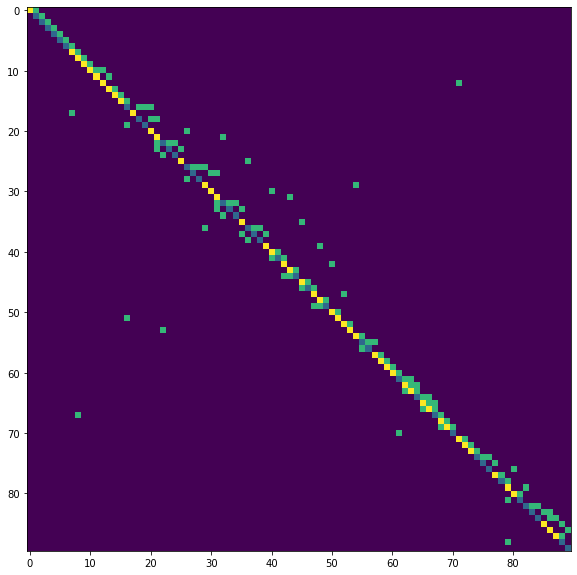

In [63]:
plt.figure(figsize=(10, 10))
plt.imshow(mat)

In [64]:
froms = {}
for s in adj.keys():
    for t in adj[s]:
        if t not in froms:
            froms[t] = set()
        froms[t].add(s)
froms

{0: {0},
 1: {0},
 2: {1},
 3: {2},
 4: {3},
 5: {4},
 6: {5},
 7: {6, 7, 17},
 8: {7, 8, 67},
 9: {8, 9},
 10: {9, 10},
 11: {10, 11},
 12: {10, 12},
 13: {11, 13},
 14: {13, 14},
 15: {14, 15},
 16: {15, 19, 51},
 17: {17},
 18: {16},
 19: {16},
 20: {16, 18, 20},
 21: {18, 21, 22, 23},
 24: {22},
 23: {22},
 25: {23, 25},
 22: {24, 53},
 26: {20, 28},
 27: {26},
 28: {26},
 29: {26, 29, 36},
 30: {27, 30},
 31: {27, 31, 32, 33},
 32: {21, 34},
 33: {32},
 34: {32},
 35: {33, 35, 37},
 36: {25, 38},
 37: {36},
 38: {36},
 39: {37, 39},
 40: {30, 40, 41},
 41: {40},
 42: {41, 42, 44},
 43: {31, 43, 44},
 44: {43},
 45: {35, 45, 46},
 46: {45},
 47: {46, 47, 49},
 48: {39, 48, 49},
 49: {48},
 50: {42, 50},
 51: {50, 51},
 52: {47, 52},
 53: {52, 53},
 54: {29, 54},
 55: {54, 56},
 56: {55},
 57: {55, 57},
 58: {57, 58},
 59: {58, 59},
 60: {59, 60},
 61: {60, 70},
 62: {61, 62, 63},
 63: {61, 62, 63},
 64: {62, 63},
 65: {64, 65, 66},
 66: {64, 65, 66},
 67: {65, 66},
 68: {67, 68, 69